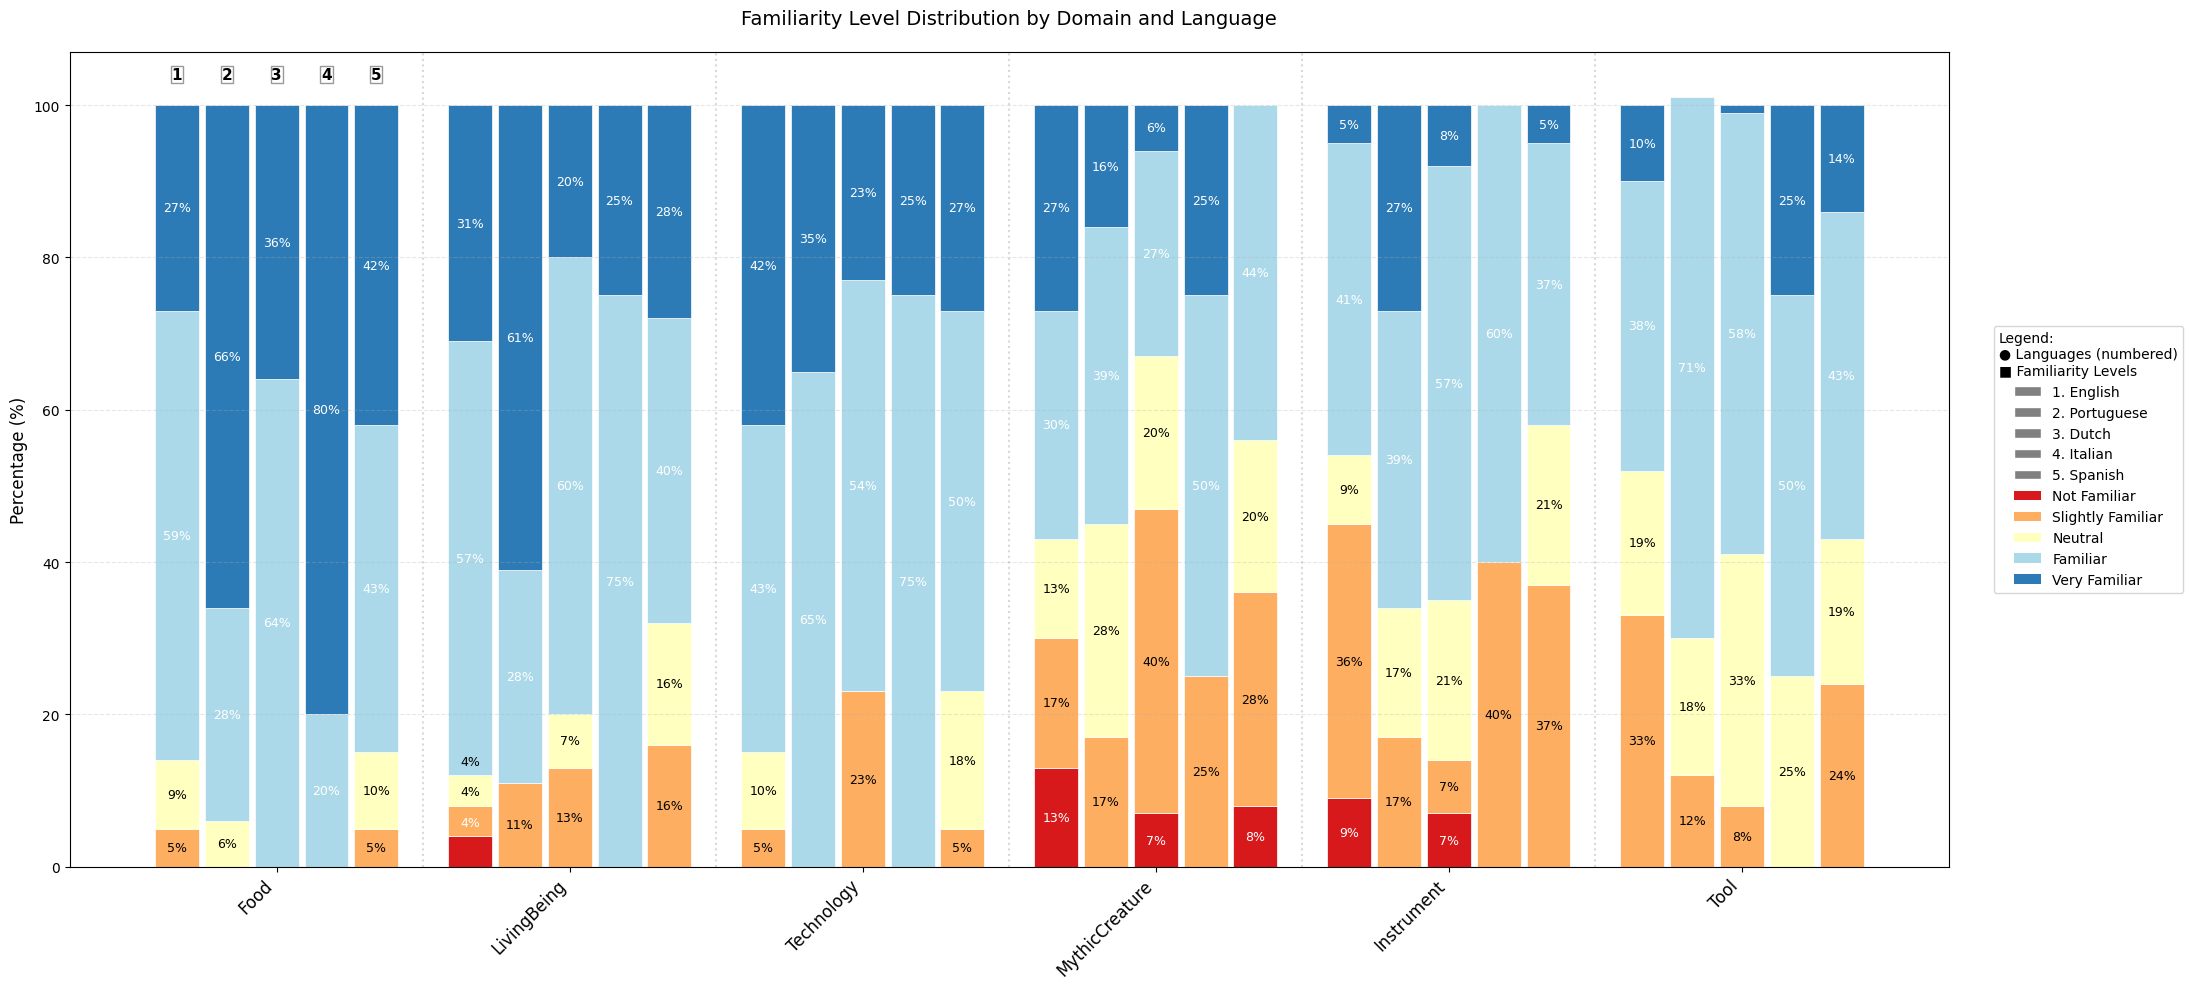

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# New dataset with familiarity scale
data = {
    'Food': {
        'English': [0, 32, 64, 415, 192],
        'Portuguese': [0, 0, 32, 160, 383],
        'Dutch': [0, 0, 0, 288, 160],
        'Italian': [0, 0, 0, 32, 128],
        'Spanish': [0, 32, 64, 288, 288]
    },
    'LivingBeing': {
        'English': [32, 32, 32, 416, 224],
        'Portuguese': [0, 64, 0, 160, 352],
        'Dutch': [0, 64, 32, 288, 96],
        'Italian': [0, 0, 0, 96, 32],
        'Spanish': [0, 128, 128, 320, 224]
    },
    'Technology': {
        'English': [0, 31, 62, 279, 279],
        'Portuguese': [0, 0, 0, 341, 186],
        'Dutch': [0, 93, 0, 217, 93],
        'Italian': [0, 0, 0, 93, 31],
        'Spanish': [0, 31, 124, 341, 186]
    },
    'MythicCreature': {
        'English': [96, 128, 96, 224, 192],
        'Portuguese': [0, 96, 160, 224, 96],
        'Dutch': [32, 192, 96, 128, 32],
        'Italian': [0, 32, 0, 64, 32],
        'Spanish': [64, 224, 160, 352, 0]
    },
    'Instrument': {
        'English': [64, 256, 64, 288, 32],
        'Portuguese': [0, 96, 96, 224, 160],
        'Dutch': [32, 32, 96, 256, 32],
        'Italian': [0, 64, 0, 96, 0],
        'Spanish': [0, 224, 128, 224, 32]
    },
    'Tool': {
        'English': [0, 217, 124, 248, 62],
        'Portuguese': [0, 62, 93, 372, 0],
        'Dutch': [0, 31, 124, 217, 0],
        'Italian': [0, 0, 31, 62, 31],
        'Spanish': [0, 155, 124, 279, 93]
    }
}

# Convert counts to percentages
for domain in data:
    for lang in data[domain]:
        total = sum(data[domain][lang])
        if total > 0:
            data[domain][lang] = [round(val/total*100) for val in data[domain][lang]]
            # Ensure sum is exactly 100%
            diff = 100 - sum(data[domain][lang])
            if diff != 0:
                data[domain][lang][-1] += diff

domains = list(data.keys())
languages = ['English', 'Portuguese', 'Dutch', 'Italian', 'Spanish']
confidence_levels = ['Not Familiar', 'Slightly Familiar', 'Neutral', 'Familiar', 'Very Familiar']
colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']  # Red to blue gradient

# Plot setup
fig, ax = plt.subplots(figsize=(22, 10))
x = np.arange(len(domains))
width = 0.15
gap = 0.02

# Calculate positions
n_languages = len(languages)
cluster_width = n_languages * width + (n_languages - 1) * gap
language_offsets = np.linspace(-cluster_width/2 + width/2, cluster_width/2 - width/2, n_languages)

# Create bars with percentage labels
for domain_idx, domain in enumerate(domains):
    for lang_idx, lang in enumerate(languages):
        bottom = 0
        for conf_idx, (conf, color) in enumerate(zip(confidence_levels, colors)):
            value = data[domain][lang][conf_idx]
            if value > 0:
                bar = ax.bar(x[domain_idx] + language_offsets[lang_idx], value, width,
                            bottom=bottom, color=color, edgecolor='white', linewidth=0.5)

                # Percentage label positioning
                y_pos = bottom + value/2

                # Determine text color based on segment color
                if conf_idx in [0, 3, 4]:  # Red and blue segments - white text
                    text_color = 'white'
                else:  # Yellow/neutral segments - black text
                    text_color = 'black'

                # Adjust position for very small values
                if value < 5:
                    y_pos = bottom + value + 1
                    va = 'bottom'
                else:
                    va = 'center'

                ax.text(x[domain_idx] + language_offsets[lang_idx], y_pos, f'{value}%',
                       ha='center', va=va, color=text_color, fontsize=9)

            bottom += value

# Add language numbers - positioned at 103% of y-axis
for lang_idx, lang in enumerate(languages):
    for domain_idx in [0]:  # Only show above first domain
        ax.text(x[domain_idx] + language_offsets[lang_idx], 103, str(lang_idx+1),
               ha='center', va='bottom', fontsize=11, fontweight='bold',
               bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', pad=0.5))

# Create legend
legend_elements = [
    Patch(facecolor='gray', edgecolor='white', label=f"{i+1}. {lang}")
    for i, lang in enumerate(languages)
] + [
    Patch(facecolor=colors[i], label=confidence_levels[i])
    for i in range(len(confidence_levels))
]

ax.legend(handles=legend_elements,
          title='Legend:\n● Languages (numbered)\n■ Familiarity Levels',
          bbox_to_anchor=(1.02, 0.5),
          loc='center left',
          fontsize=10)

# Formatting
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Familiarity Level Distribution by Domain and Language', fontsize=14, pad=20)
ax.set_xticks(x, domains, fontsize=12)
ax.set_ylim(0, 107)  # Adjusted to accommodate language numbers
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Domain separators
for i in range(len(domains)-1):
    ax.axvline(i+0.5, color='gray', linestyle=':', alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('familiarity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()